In [1]:
using Plots, LinearAlgebra, SparseArrays, BenchmarkTools, LaTeXStrings
using NAJ

In [102]:
function threebody(m1::Real, m2::Real, m3::Real, G::Real, r)
    r12 = r[4:6] .- r[1:3]
    r23 = r[7:9] .- r[4:6]
    r31 = r[1:3] .- r[7:9] 
    
    n12 = norm(r12)^3
    n23 = norm(r23)^3
    n31 = norm(r31)^3

    k12 = (G*m1*m2/n12) 
    k23 = (G*m2*m3/n23)
    k31 = (G*m3*m1/n31) 
    
    A = zeros(18, 18)
    
    for i in 1:9
        A[i, 9+i] = 1.0
    end

    II = [1.0 0 0; 0 1 0; 0 0 1]
    if m1 > 0.0
        A[10:12, 4:6] = (1/m1 * k12) .* II
        A[10:12, 1:3] += - A[10:12, 4:6]
        A[10:12, 7:9] = (-1.0/m1 * k31) .* II
        A[10:12, 1:3] += - A[10:12, 7:9]
    end

    if m2 > 0.0
        A[13:15, 1:3] = (-1/m2*k12) .* II
        A[13:15, 4:6] += -A[13:15, 1:3]
        A[13:15, 7:9] = (1/m2*k23) .* II
        A[13:15, 4:6] += -A[13:15, 7:9]
    end
    
    if m3 > 0.0
        A[16:18, 1:3] = (1/m3*k31) .* II
        A[16:18, 7:9] += -A[16:18, 1:3]
        A[16:18, 4:6] = (-1/m3*k23) .* II
        A[16:18, 7:9] += -A[16:18, 4:6]
    end

    return A*r
end

threebody (generic function with 1 method)

In [103]:
norm([1;1;1]) - sqrt(3.)

0.0

In [104]:
m0 = 5.972e24
v0 = 29.78e3
r0 =147.10e9

m1 = 1.0*m0
m2 = 0.0 #1.0*m0
m3 = 1.0e5*m0


G =  6.67384e−11
r1 = [1 ; 0; 0] .* r0
r2 = [-1 ; 4; 0] .* r0
r3 = [0; 0; 0] .* r0
v1 = [1; 0; 0] .* v0
v2 = [0; 0; 0] .* v0
v3 = [0; 0; 0] .* v0
s = [r1; r2; r3; v1 ;v2 ; v3]
# A=threebodythreebody(1, 1, 1, 1, [1 ; 1; 1], [2; 2; 2], [3; 3; 3], [1 ; 1; 1], [2; 2; 2], [3; 3; 3])
tn, xn = ode_rk4((t, y)->threebody(m1, m2, m3, G, y), 0.0, s, 87000, 3600)

([0.0, 3600.0, 7200.0, 10800.0, 14400.0, 18000.0, 21600.0, 25200.0, 28800.0, 32400.0  …  3.13164e8, 3.131676e8, 3.131712e8, 3.131748e8, 3.131784e8, 3.13182e8, 3.131856e8, 3.131892e8, 3.131928e8, 3.131964e8], [1.471e11 1.47207208e11 … 9.473981584e12 9.474088792e12; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

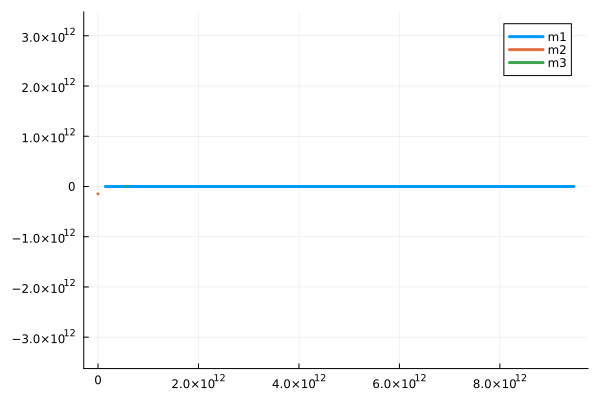

In [105]:
plot(xn[1,:], xn[2, :], aspect_ratio = :equal, label = "m1", lw=3)
plot!(xn[3,:], xn[4, :],  label = "m2", lw=3)
plot!(xn[5,:], xn[6, :],  label = "m3", lw=3)

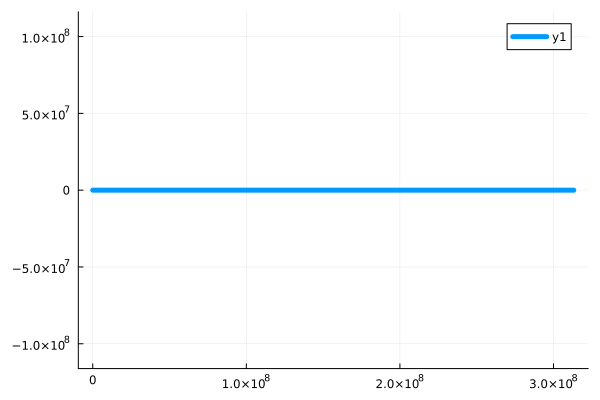

In [94]:
plot(tn, xn[11, :], aspect_ratio = :equal, lw=5)

In [95]:
norm([1 2;3 4], 2)

5.477225575051661